#  Wyniki egzaminu maturalnego
## Michał Śmiechowicz 240817
## Eksploracyjna analiza danych

Poniżej przedstawiam przeanalizowane przeze mnie dane pobrane w postaci pliku .csv (źródło: https://dane.gov.pl/pl).

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

C:\Users\Michał\AppData\Local\Temp\ipykernel_2980\2011421623.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
dane = pd.read_csv(".\dane\srednia_matura.csv", sep=";", header=0, )

In [3]:
dane.head()
dane.pop("flaga")
dane.pop("nazwa_zmiennej")
dane['wartosc'] = dane['wartosc'].str.replace(',', '.').astype(float)
dane.loc[dane['rodzaj_egzaminu'] == 'ustny', 'poziom_egzaminu'] = 'ustny'

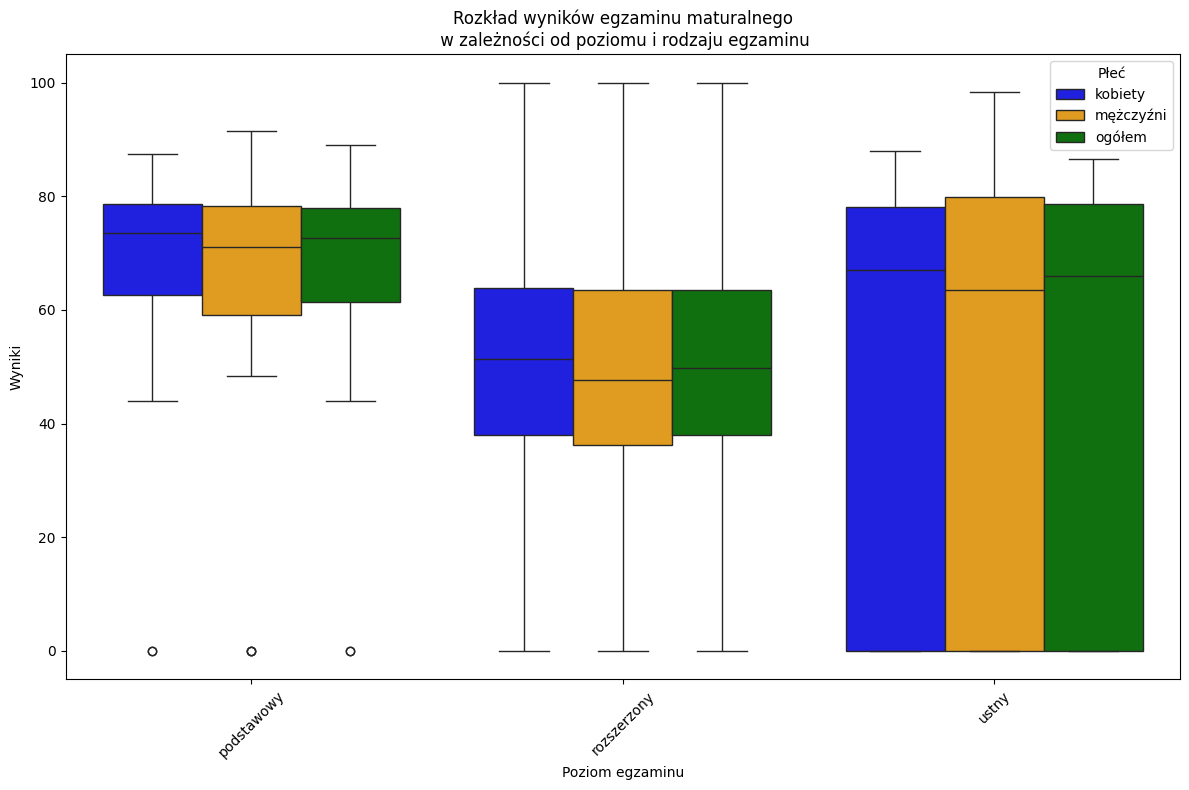

In [4]:
palette = {'kobiety': 'blue', 'mężczyźni': 'orange', 'ogółem' : 'green'}
plt.figure(figsize=(12, 8))
sns.boxplot(data=dane, x='poziom_egzaminu', y='wartosc', hue='plec', palette=palette)
plt.title('Rozkład wyników egzaminu maturalnego\n w zależności od poziomu i rodzaju egzaminu')
plt.xlabel('Poziom egzaminu')
plt.ylabel('Wyniki')
plt.xticks(rotation=45)
plt.legend(title='Płeć')
plt.tight_layout()
plt.show()


Na powyższym wykresie przedstawiłem wykres pudełkowy utworzony na podstawie wyników z poszczególnych poziomów egzaminu oraz z formuły ustnej dla każdej z płci analizowanej zarówno osobno, jak i razem. Możemy zauważyć, że wyniki sięgające wartości 100% pojawiają się jedynie na poziomie rozszerzonym. Wartością minimalną dla poziomu rozszerzonego jest wynik 0, podobnie jak w przypadku egzaminu ustnego. Dla poziomu podstawowego są to wartości odstające. Mediana wyników dla mężczyzn jest minimalnie niższa we wszystkich 3 przypadkach, jednak ich wartości maksymalne są wyższe. Na poziomie rozszerzeonym najwięcej osób uzyskuje wyniki w granicach 40-65%, na poziomie podstawowym 60-75%, natomiast na egzaminie ustnym wyniki są najbardziej rozrzucone - od 75% aż do 0. W kwestii podziału na płcie, wyniki są dość wyrównane.

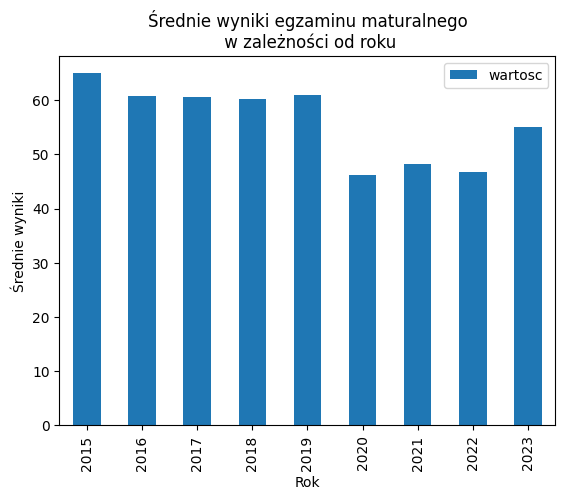

In [5]:
dane.pivot_table(index='rok', values='wartosc', aggfunc='mean').plot(kind='bar', ax=plt.gca())
plt.title('Średnie wyniki egzaminu maturalnego\n w zależności od roku')
plt.xlabel('Rok')
plt.ylabel('Średnie wyniki')
plt.show()

Powyżej zamieściłem wykres przedstawiający średnie wyniki z egzaminów w poszczególnych latach 2015-2023. Na początku dekady można zaobserwować spadek z poziomu 60-65% na 45% przez 3 lata. Jednak matury przeprowadzone w roku 2023 ponownie wróciły na poziom 55%.

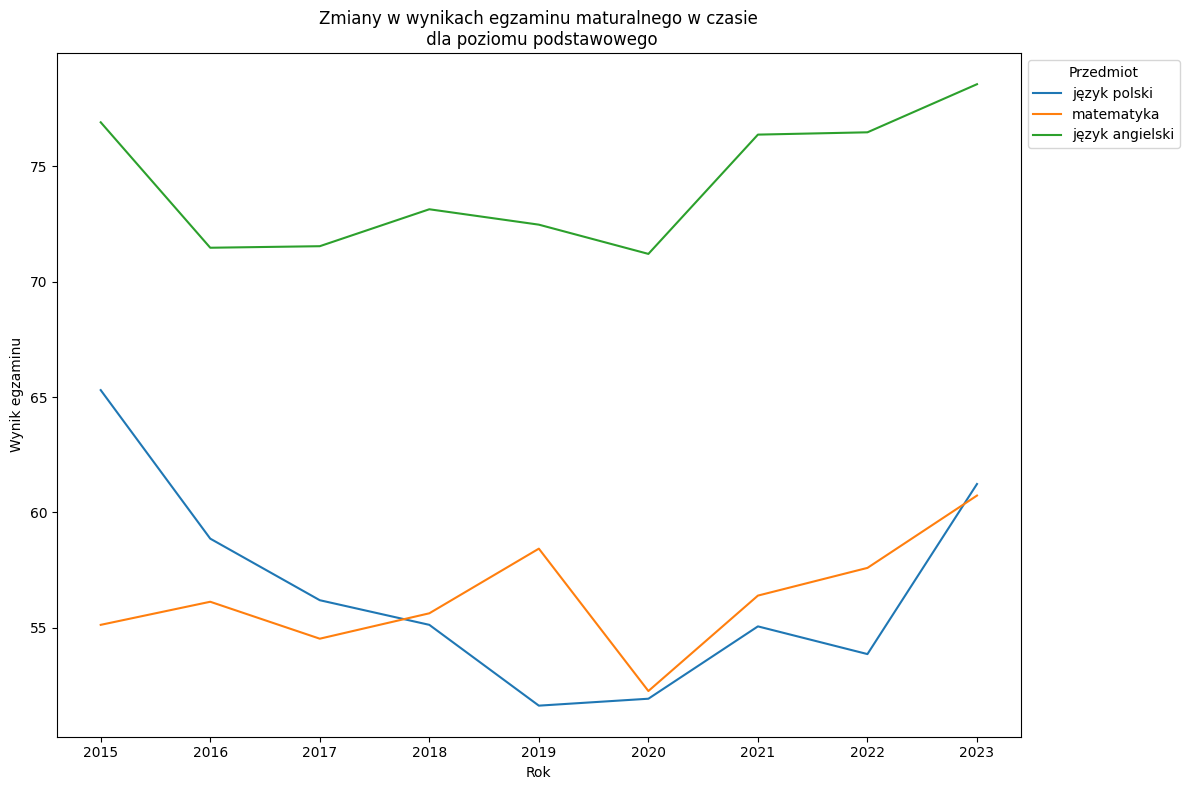

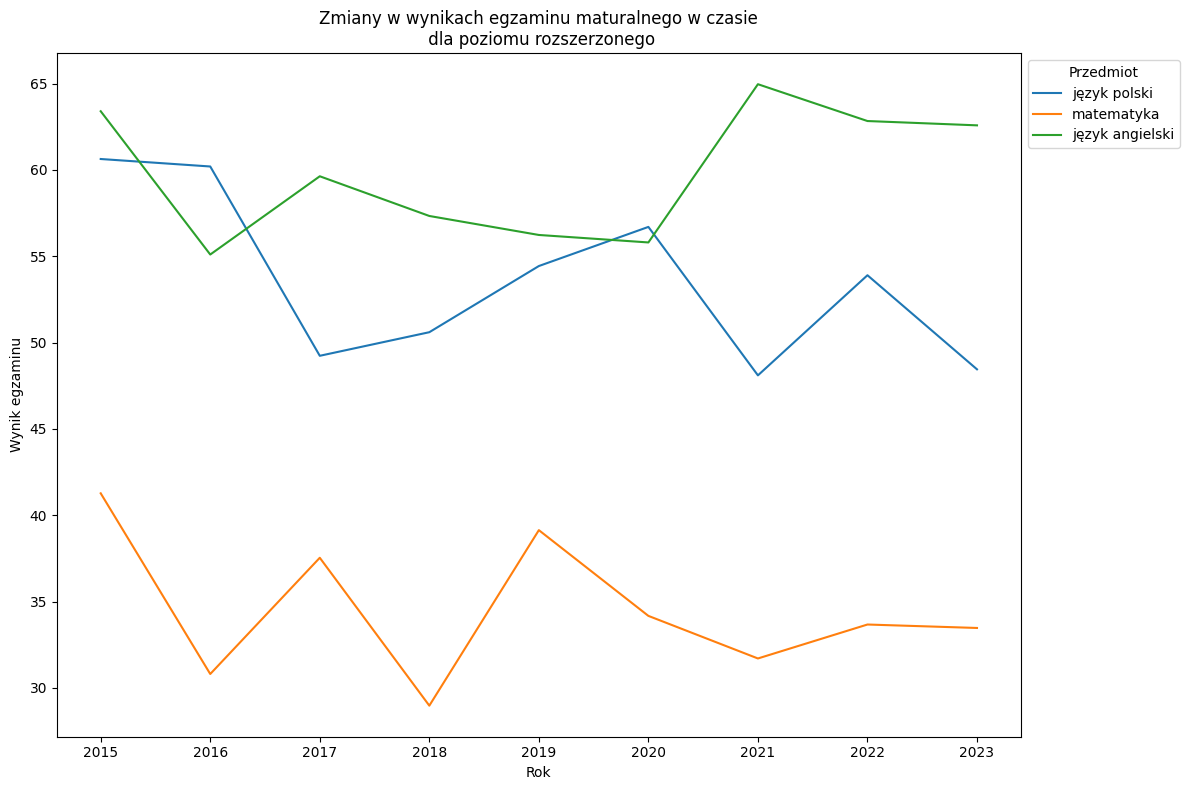

In [6]:
plt.figure(figsize=(12, 8))

podstawowy_dane = dane[(dane['poziom_egzaminu'] == 'podstawowy') & (dane['przedmiot'].isin(['język polski', 'matematyka', 'język angielski']))]

sns.lineplot(data=podstawowy_dane, x='rok', y='wartosc', hue='przedmiot', errorbar=None)
plt.title('Zmiany w wynikach egzaminu maturalnego w czasie\n dla poziomu podstawowego')
plt.xlabel('Rok')
plt.ylabel('Wynik egzaminu')
plt.legend(title='Przedmiot', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 8))

rozszerzony_dane = dane[(dane['poziom_egzaminu'] == 'rozszerzony') & (dane['przedmiot'].isin(['język polski', 'matematyka', 'język angielski']))]

sns.lineplot(data=rozszerzony_dane, x='rok', y='wartosc', hue='przedmiot', errorbar=None)
plt.title('Zmiany w wynikach egzaminu maturalnego w czasie\n dla poziomu rozszerzonego')
plt.xlabel('Rok')
plt.ylabel('Wynik egzaminu')
plt.legend(title='Przedmiot', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()


Powyżej zamieściłem dwa wykresy, przedstawiające zmienność wyników w czasie dla egzaminów z języka polskiego, angielskiego oraz matematyki, osobno dla poziomu podstawowego i rozszerzonego. 

Na poziomie podstawowym język polski trzyma się w ramach 45-65%, a matematyka 45-58%. Język angielski natomiast wynikami znacznie przewyższa pozostałe dwa przedmioty - 72-78%. Możemy zaobserwować dużą zmienność w egzaminie z języka polskiego. Wyniki mocno spadły przed rokiem 2020, jednak od następnego egzaminu zaczęły się podnosić. Natomiast język angielski i matematyka przekroczyły uprzednie wartości maksymalne, zatem wyniki z nich ulegają poprawie.

Na poziomie rozszerzonym zmienność wszystkich 3 przedmiotów utrzymuje się na poziomie 15%, jednak w różnych przedziałach. Najniższe wyniki są dla matematematyki w granicach 30-42%, następnie język polski - 49-62% oraz angielski - 55-62%. Możemy również zaobserwować, że od lat 2019/2020 możemy zauważyć stabilizację zmienności wyników z matematyki. Język angielski trzyma swój poziom, jednak język polski posiada obecnie minimalnie niższą górną granicę niż w przed rokiem 2020.

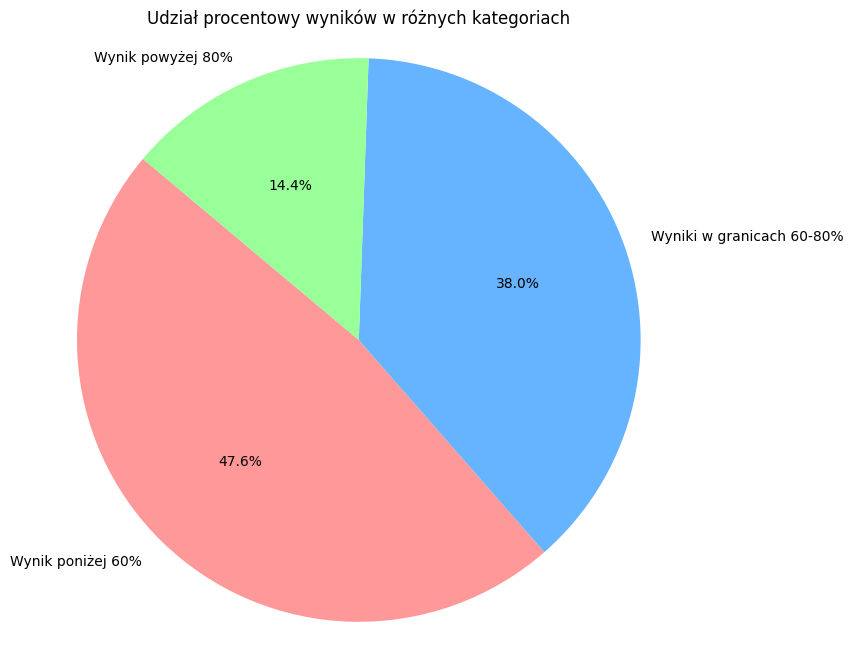

In [7]:
bins = [0, 60, 80, 100]
labels = ['Wynik poniżej 60%', 'Wyniki w granicach 60-80%', 'Wynik powyżej 80%']

dane['wynik_kategoria'] = pd.cut(dane['wartosc'], bins=bins, labels=labels)

wyniki_procent = dane['wynik_kategoria'].value_counts(normalize=True) * 100

plt.figure(figsize=(8, 8))
plt.pie(wyniki_procent, labels=wyniki_procent.index, autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff','#99ff99'])
plt.title('Udział procentowy wyników w różnych kategoriach')
plt.axis('equal') 
plt.show()


Na powyższym wykresie przedstawiłem ilość osób, która uzyskała wyniki poniżej 60%, w granicach 60-80% oraz powyżej 80%. Możemy zauważyć, że niemal połowa osób podchodzących do egzaminu uzyskała wynik poniżej 60%, natomiast trochę powyżej 1/3 zdających, mieści się w przedziale 60-80%.